# Financial Portfolios, Modern Portfolio Theory & Asset Pricing

## Getting the Data

In [1]:
import pandas as pd
import yfinance as yf

In [ ]:
#stocks = yf.download(["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"], 
                     #start = "2014-01-01", end = "2018-12-31")

In [2]:
stocks = pd.read_csv("../data/index_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])

In [3]:
stocks.head()

Adj Close                                        Close          \
                AMZN      BA    DIS     IBM     KO   MSFT    AMZN      BA   
Date                                                                        
2013-12-31    398.79  116.45  70.73  147.56  34.08  32.69  398.79  136.49   
2014-01-02    397.97  116.60  70.61  145.96  33.54  32.47  397.97  136.67   
2014-01-03    396.44  117.41  70.46  146.83  33.37  32.25  396.44  137.62   
2014-01-06    393.63  118.09  70.20  146.33  33.22  31.57  393.63  138.41   
2014-01-07    398.03  119.88  70.68  149.25  33.32  31.82  398.03  140.51   

                           ...   Open                         Volume           \
              DIS     IBM  ...    DIS     IBM     KO   MSFT     AMZN       BA   
Date                       ...                                                  
2013-12-31  76.40  187.57  ...  76.28  186.49  41.13  37.40  1996500  2096000   
2014-01-02  76.27  185.53  ...  76.04  187.21  41.12  37.35  2137800  3366700   
2014-01-03  76.11  186.64  ...  76.30  185.83  40.68  37.20  2210200  3177400   
2014-01-06  75.82  186.00  ...  76.53  187.15  40.48  36.85  3170600  4196500   
2014-01-07  76.34  189.71  ...  76.12  186.39  40.48  36.33  1916000  4238500   

                                                  
                DIS      IBM        KO      MSFT  
Date                                              
2013-12-31  4692300  3619700  11729200  17503500  
2014-01-02  5200900  4546500  12698600  30632200  
2014-01-03  4060700  4063200  10403400  31134800  
2014-01-06  6816200  4067800  11036300  43603700  
2014-01-07  4494900  5932300  11872300  35802800  

[5 rows x 36 columns]

In [4]:
stocks.tail()

Adj Close                                          Close          \
                AMZN      BA     DIS     IBM     KO   MSFT     AMZN      BA   
Date                                                                          
2018-12-21   1377.45  297.69  103.58  105.86  46.11  96.80  1377.45  304.55   
2018-12-24   1343.96  287.53   99.73  102.65  44.55  92.76  1343.96  294.16   
2018-12-26   1470.90  306.86  105.18  106.29  45.50  99.09  1470.90  313.93   
2018-12-27   1461.64  310.00  105.86  108.57  46.07  99.71  1461.64  317.14   
2018-12-28   1478.02  309.25  106.64  107.86  45.75  98.93  1478.02  316.38   

                            ...    Open                           Volume  \
               DIS     IBM  ...     DIS     IBM     KO    MSFT      AMZN   
Date                        ...                                            
2018-12-21  104.22  110.94  ...  106.47  112.50  47.26  101.63  13640300   
2018-12-24  100.35  107.57  ...  103.23  109.90  47.62   97.68   7220000   
2018-12-26  105.83  111.39  ...  100.49  108.00  45.88   95.14  10411800   
2018-12-27  106.52  113.78  ...  104.41  109.99  46.74   99.30   9722000   
2018-12-28  107.30  113.03  ...  107.28  114.22  47.89  102.09   8829000   

                                                              
                 BA       DIS       IBM        KO       MSFT  
Date                                                          
2018-12-21  7641700  15530600  10386500  32477700  111242100  
2018-12-24  3435300   7133000   3821400  10733700   43935200  
2018-12-26  4843400   9422800   6645800  14342600   51634800  
2018-12-27  4341100   8201400   6045600  16966500   49498500  
2018-12-28  3725200   7620500   5117500  13218200   38196300  

[5 rows x 36 columns]

In [5]:
stocks = stocks["Adj Close"].copy()

In [8]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,398.79,116.45,70.73,147.56,34.08,32.69
2014-01-02,397.97,116.60,70.61,145.96,33.54,32.47
2014-01-03,396.44,117.41,70.46,146.83,33.37,32.25
2014-01-06,393.63,118.09,70.20,146.33,33.22,31.57
2014-01-07,398.03,119.88,70.68,149.25,33.32,31.82


In [7]:
stocks.to_csv("port_stocks.csv")

## Creating the equal-weighted Portfolio

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.4f}'.format

In [29]:
stocks = pd.read_csv("port_stocks.csv", parse_dates= ["Date"], index_col= "Date")

In [30]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,398.7900,116.4500,70.7300,147.5600,34.0800,32.6900
2014-01-02,397.9700,116.6000,70.6100,145.9600,33.5400,32.4700
2014-01-03,396.4400,117.4100,70.4600,146.8300,33.3700,32.2500
2014-01-06,393.6300,118.0900,70.2000,146.3300,33.2200,31.5700
2014-01-07,398.0300,119.8800,70.6800,149.2500,33.3200,31.8200


In [31]:
ret = stocks.pct_change().dropna()

In [32]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179


In [33]:
ret.mean(axis = 1)

Date
2014-01-02   -0.0060
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0107
2014-01-08   -0.0068
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1257, dtype: float64

In [34]:
no_assets = len(stocks.columns)
no_assets

6

In [35]:
weights = [1/no_assets for i in range(no_assets)]
weights

[0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666,
 0.16666666666666666]

In [37]:
ret.mul(weights, axis = "columns").sum(axis = 1)

# Same as:
# (ret * weights).sum(axis = 1)

Date
2014-01-02   -0.0060
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0107
2014-01-08   -0.0068
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1257, dtype: float64

In [38]:
ret.dot(weights)

Date
2014-01-02   -0.0060
2014-01-03   -0.0008
2014-01-06   -0.0057
2014-01-07    0.0107
2014-01-08   -0.0068
               ...  
2018-12-21   -0.0267
2018-12-24   -0.0336
2018-12-26    0.0569
2018-12-27    0.0084
2018-12-28   -0.0009
Length: 1257, dtype: float64

In [39]:
ret["EWP"] = ret.dot(weights)

In [40]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,EWP
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067,-0.0060
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068,-0.0008
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211,-0.0057
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079,0.0107
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0068


In [21]:
summary = ret.agg(["mean", "std"]).T

In [41]:
summary

,Return,Risk
AMZN,0.3105,0.3099
BA,0.2231,0.2331
DIS,0.1002,0.1887
IBM,-0.0428,0.1994
KO,0.0685,0.1370
MSFT,0.2488,0.2316
EWP,0.1514,0.1514


In [23]:
summary.columns = ["Return", "Risk"]

In [24]:
summary.Return = summary.Return*252
summary.Risk = summary.Risk * np.sqrt(252)

In [25]:
summary

,Return,Risk
AMZN,0.3105,0.3099
BA,0.2231,0.2331
DIS,0.1002,0.1887
IBM,-0.0428,0.1994
KO,0.0685,0.1370
MSFT,0.2488,0.2316
EWP,0.1514,0.1514


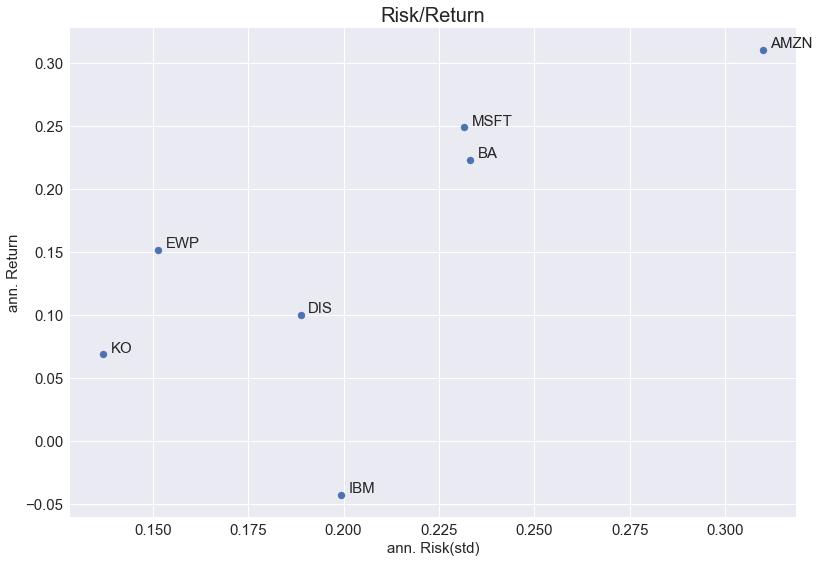

In [26]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [6]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

## Creating many Random Portfolios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
pd.options.display.float_format = '{:.4f}'.format

In [2]:
stocks = pd.read_csv("port_stocks.csv", parse_dates= ["Date"], index_col= "Date")

In [3]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,398.7900,116.4500,70.7300,147.5600,34.0800,32.6900
2014-01-02,397.9700,116.6000,70.6100,145.9600,33.5400,32.4700
2014-01-03,396.4400,117.4100,70.4600,146.8300,33.3700,32.2500
2014-01-06,393.6300,118.0900,70.2000,146.3300,33.2200,31.5700
2014-01-07,398.0300,119.8800,70.6800,149.2500,33.3200,31.8200


In [4]:
ret = stocks.pct_change().dropna()
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179


In [7]:
summary = ann_risk_return(ret)

In [8]:
summary

,Return,Risk
AMZN,0.3105,0.3099
BA,0.2231,0.2331
DIS,0.1002,0.1887
IBM,-0.0428,0.1994
KO,0.0685,0.1370
MSFT,0.2488,0.2316


In [9]:
noa = len(stocks.columns)
noa

6

In [10]:
nop = 100000
nop

100000

In [11]:
np.random.random(10*6).reshape(10,6)

array([[0.95027959, 0.98025864, 0.76294277, 0.52347901, 0.18609031,
        0.66397179],
       [0.22264714, 0.40334592, 0.16315725, 0.29999708, 0.94146485,
        0.94093868],
       [0.50418577, 0.40294944, 0.69575703, 0.38610977, 0.70543731,
        0.75947169],
       [0.21866759, 0.7402358 , 0.56686023, 0.6294453 , 0.35343952,
        0.76990312],
       [0.83788272, 0.7301004 , 0.54071357, 0.15104076, 0.70124283,
        0.56366347],
       [0.03259472, 0.95157889, 0.72997328, 0.0760491 , 0.75865466,
        0.25749321],
       [0.17098523, 0.20543186, 0.34736824, 0.25494753, 0.08140792,
        0.88097017],
       [0.20810961, 0.69282468, 0.36354684, 0.14630283, 0.60978649,
        0.58679092],
       [0.43932812, 0.65464559, 0.59103531, 0.91268766, 0.94913448,
        0.36582612],
       [0.73144737, 0.06803408, 0.59371597, 0.21682945, 0.92756435,
        0.22660142]])

In [12]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [13]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
        0.42310646],
       [0.9807642 , 0.68482974, 0.4809319 , 0.39211752, 0.34317802,
        0.72904971],
       [0.43857224, 0.0596779 , 0.39804426, 0.73799541, 0.18249173,
        0.17545176],
       ...,
       [0.51954687, 0.85226532, 0.87403327, 0.10039779, 0.25265273,
        0.01875777],
       [0.64206112, 0.41780645, 0.76066273, 0.33994549, 0.1620518 ,
        0.94008933],
       [0.23120286, 0.86951896, 0.50415836, 0.32237088, 0.25906289,
        0.90163486]])

In [14]:
matrix.shape

(100000, 6)

In [15]:
matrix.sum(axis = 1, keepdims= True)

array([[2.90335017],
       [3.61087108],
       [1.99223329],
       ...,
       [2.61765375],
       [3.26261692],
       [3.08794881]])

In [16]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [17]:
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.19847807, 0.32558367, 0.3338995 , 0.03835411, 0.09651877,
        0.00716587],
       [0.19679329, 0.12805869, 0.23314497, 0.10419412, 0.04966927,
        0.28813966],
       [0.07487263, 0.28158464, 0.16326642, 0.10439645, 0.08389481,
        0.29198504]])

In [18]:
weights.shape

(100000, 6)

In [19]:
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [20]:
port_ret = ret.dot(weights.T)

In [21]:
port_ret

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,-0.0075,-0.0046,-0.0068,-0.0068,-0.0051,-0.0067,-0.0050,-0.0056,-0.0070,-0.0082,...,-0.0020,-0.0088,-0.0042,-0.0044,-0.0069,-0.0064,-0.0055,-0.0025,-0.0045,-0.0045
2014-01-03,-0.0015,-0.0012,0.0001,-0.0006,-0.0022,0.0002,0.0005,-0.0024,0.0001,-0.0013,...,0.0007,-0.0015,0.0031,0.0004,-0.0017,-0.0003,-0.0011,0.0005,-0.0019,-0.0005
2014-01-06,-0.0063,-0.0064,-0.0057,-0.0057,-0.0078,-0.0045,-0.0024,-0.0081,-0.0055,-0.0061,...,-0.0017,-0.0063,-0.0015,-0.0053,-0.0091,-0.0078,-0.0058,-0.0015,-0.0082,-0.0064
2014-01-07,0.0104,0.0109,0.0126,0.0109,0.0101,0.0110,0.0107,0.0090,0.0119,0.0101,...,0.0105,0.0105,0.0140,0.0127,0.0116,0.0117,0.0105,0.0105,0.0102,0.0109
2014-01-08,-0.0057,-0.0046,-0.0067,-0.0077,-0.0056,-0.0088,-0.0061,-0.0103,-0.0060,-0.0087,...,-0.0061,-0.0066,-0.0042,-0.0048,-0.0073,-0.0114,-0.0049,-0.0038,-0.0079,-0.0082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.0264,-0.0326,-0.0282,-0.0248,-0.0327,-0.0215,-0.0244,-0.0265,-0.0254,-0.0214,...,-0.0284,-0.0238,-0.0255,-0.0321,-0.0309,-0.0242,-0.0288,-0.0297,-0.0320,-0.0275
2018-12-24,-0.0323,-0.0330,-0.0318,-0.0336,-0.0333,-0.0345,-0.0334,-0.0359,-0.0329,-0.0338,...,-0.0345,-0.0320,-0.0334,-0.0326,-0.0330,-0.0360,-0.0332,-0.0331,-0.0347,-0.0357
2018-12-26,0.0555,0.0653,0.0548,0.0535,0.0653,0.0499,0.0545,0.0578,0.0546,0.0490,...,0.0614,0.0506,0.0572,0.0633,0.0601,0.0532,0.0610,0.0628,0.0644,0.0603


In [22]:
port_summary = ann_risk_return(port_ret)

In [23]:
port_summary

,Return,Risk
0,0.1494,0.1534
1,0.1921,0.1711
2,0.1074,0.1588
3,0.1320,0.1466
4,0.1953,0.1723
...,...,...
99995,0.1236,0.1553
99996,0.1829,0.1611
99997,0.1744,0.1637
99998,0.1837,0.1680


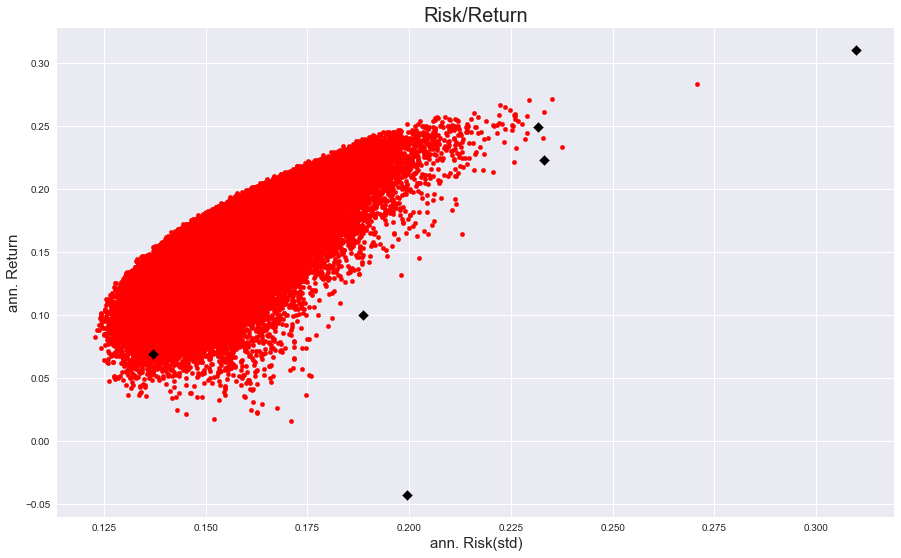

In [24]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "red")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "black", marker = "D")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## What is the Sharpe Ratio and a Risk Free Asset? 

\begin{equation}
    SharpeRatio = \frac{PortReturn - RFR}{PortRisk}
\end{equation}

In [25]:
risk_free_return = 0.017
risk_free_risk = 0

In [26]:
rf = [risk_free_return, risk_free_risk]
rf

[0.017, 0]

## Portfolio Analysis with the Sharpe Ratio

In [27]:
summary

,Return,Risk
AMZN,0.3105,0.3099
BA,0.2231,0.2331
DIS,0.1002,0.1887
IBM,-0.0428,0.1994
KO,0.0685,0.1370
MSFT,0.2488,0.2316


In [28]:
port_summary.head()

,Return,Risk
0,0.1494,0.1534
1,0.1921,0.1711
2,0.1074,0.1588
3,0.1320,0.1466
4,0.1953,0.1723


In [29]:
summary["Sharpe"] = (summary["Return"] - rf[0]) / summary["Risk"]

In [30]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2231,0.2331,0.8840
DIS,0.1002,0.1887,0.4408
IBM,-0.0428,0.1994,-0.3002
KO,0.0685,0.1370,0.3757
MSFT,0.2488,0.2316,1.0007


In [31]:
port_summary["Sharpe"] = (port_summary["Return"] - rf[0]) / port_summary["Risk"]

In [32]:
port_summary.head()

,Return,Risk,Sharpe
0,0.1494,0.1534,0.8631
1,0.1921,0.1711,1.0231
2,0.1074,0.1588,0.5689
3,0.1320,0.1466,0.7842
4,0.1953,0.1723,1.0345


In [33]:
port_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Return  100000 non-null  float64
 1   Risk    100000 non-null  float64
 2   Sharpe  100000 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


In [34]:
port_summary.describe()

,Return,Risk,Sharpe
count,100000.0000,100000.0000,100000.0000
mean,0.1512,0.1564,0.8520
std,0.0307,0.0125,0.1535
min,0.0159,0.1229,-0.0062
25%,0.1312,0.1475,0.7588
50%,0.1513,0.1553,0.8650
75%,0.1716,0.1639,0.9662
max,0.2833,0.2708,1.1813


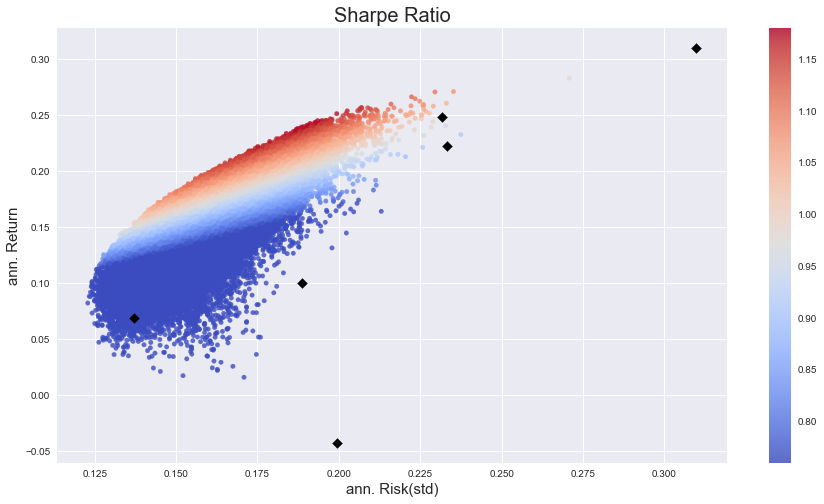

In [79]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

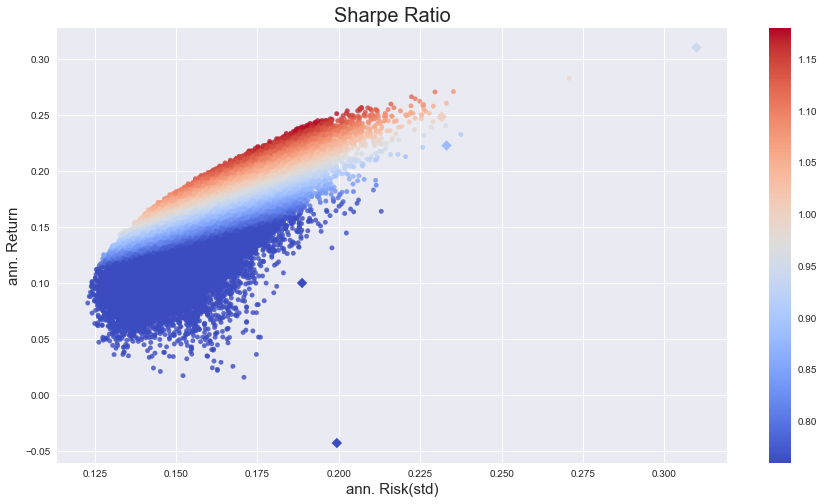

In [80]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D",
            c = summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18,)
plt.colorbar()
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Sharpe Ratio", fontsize = 20)
plt.show()

## Finding the optimal Portfolio - The "Max Sharpe Ratio Portfolio"

In [81]:
port_summary.head()

,Return,Risk,Sharpe
0,0.1494,0.1534,0.8631
1,0.1921,0.1711,1.0231
2,0.1074,0.1588,0.5689
3,0.1320,0.1466,0.7842
4,0.1953,0.1723,1.0345


In [82]:
port_summary.describe()

,Return,Risk,Sharpe
count,100000.0000,100000.0000,100000.0000
mean,0.1512,0.1564,0.8520
std,0.0307,0.0125,0.1535
min,0.0159,0.1229,-0.0062
25%,0.1312,0.1475,0.7588
50%,0.1513,0.1553,0.8650
75%,0.1716,0.1639,0.9662
max,0.2833,0.2708,1.1813


In [29]:
weights

array([[0.23988467, 0.09855488, 0.07813438, 0.18988917, 0.24780647,
        0.14573043],
       [0.27161429, 0.18965776, 0.13319   , 0.10859361, 0.09504023,
        0.20190411],
       [0.22014101, 0.02995528, 0.19979801, 0.37043624, 0.09160159,
        0.08806788],
       ...,
       [0.19847807, 0.32558367, 0.3338995 , 0.03835411, 0.09651877,
        0.00716587],
       [0.19679329, 0.12805869, 0.23314497, 0.10419412, 0.04966927,
        0.28813966],
       [0.07487263, 0.28158464, 0.16326642, 0.10439645, 0.08389481,
        0.29198504]])

In [35]:
msrp = port_summary.Sharpe.idxmax()
msrp

76879

In [36]:
msrp_p = port_summary.iloc[msrp]
msrp_p

Return   0.2428
Risk     0.1911
Sharpe   1.1813
Name: 76879, dtype: float64

In [37]:
msrp_w = weights[msrp, :]
msrp_w

array([0.27682827, 0.39151246, 0.01705514, 0.00084837, 0.05666669,
       0.25708907])

In [38]:
pd.Series(index = stocks.columns, data = msrp_w)

AMZN   0.2768
BA     0.3915
DIS    0.0171
IBM    0.0008
KO     0.0567
MSFT   0.2571
dtype: float64

In [39]:
opt_weights = pd.Series(index = stocks.columns, data = 
                        np.array([2.59608281e-01, 3.48750774e-01, 2.42861287e-17, 5.20417043e-18, 8.89045781e-17, 3.91640945e-01]))

# VADIM: Just zero out the negligible quantities, it will not change the results
opt_weights = pd.Series(index = stocks.columns, data = 
                        np.array([2.59608281e-01, 3.48750774e-01, 0, 0, 0, 3.91640945e-01]))

In [40]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [41]:
ret["MP"] = ret.dot(opt_weights)

In [42]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067,-0.0027
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068,-0.0012
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211,-0.0081
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079,0.0113
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0037


In [43]:
summary = ann_risk_return(ret)

In [45]:
summary["Sharpe"] = (summary["Return"] - rf[0]) / summary["Risk"]

In [46]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2231,0.2331,0.8840
DIS,0.1002,0.1887,0.4408
IBM,-0.0428,0.1994,-0.3002
KO,0.0685,0.1370,0.3757
MSFT,0.2488,0.2316,1.0007
MP,0.2558,0.1997,1.1962


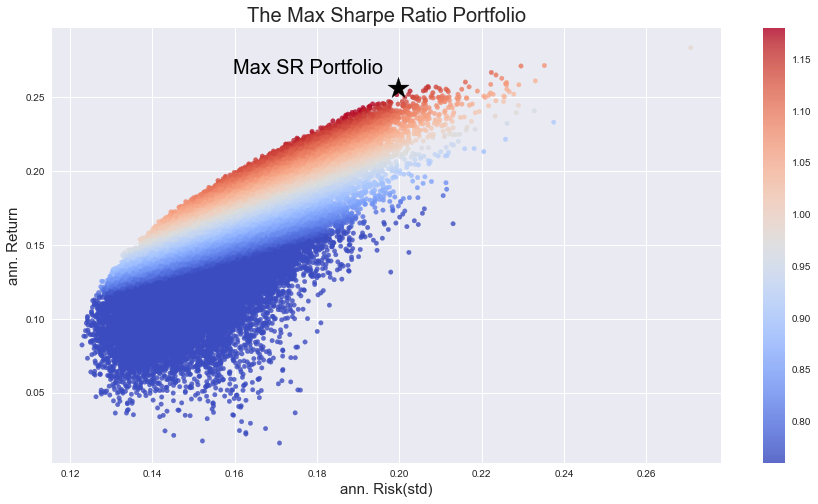

In [47]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 500, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.04, summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 20)
plt.show()

----------------------------------------

## The Sharpe Ratio - a graphical intuition (PP)

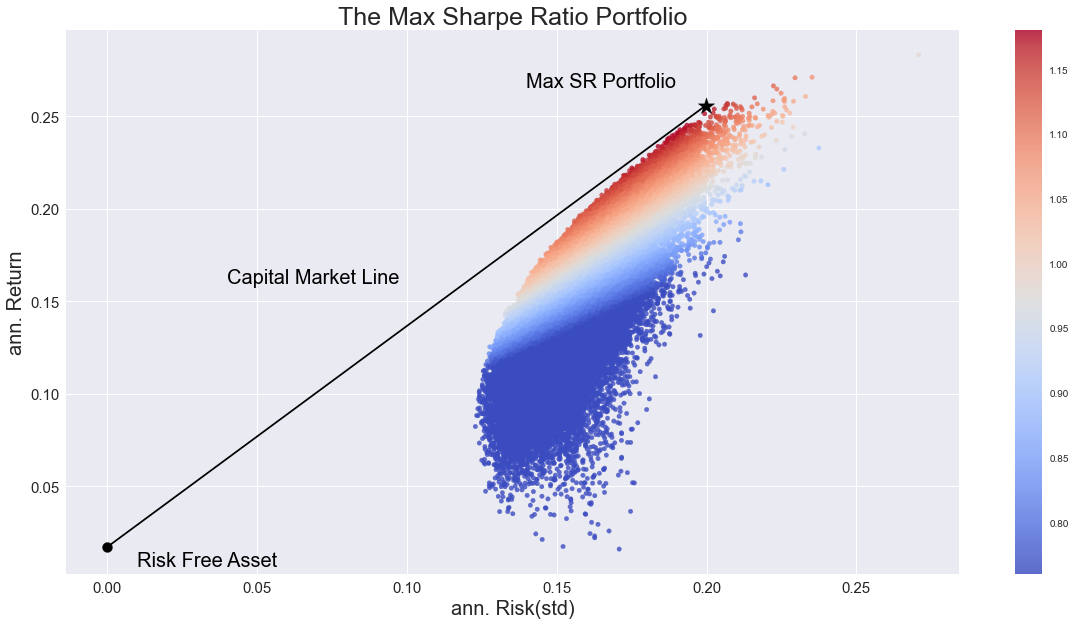

In [96]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Max SR Portfolio", xy=(summary.loc["MP", "Risk"]-0.06, summary.loc["MP", "Return"]+0.01), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 20)
plt.ylabel("ann. Return", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15)
plt.title("The Max Sharpe Ratio Portfolio", fontsize = 25)
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.show()

## Capital Market Line & Two-Fund-Theorem (PP)

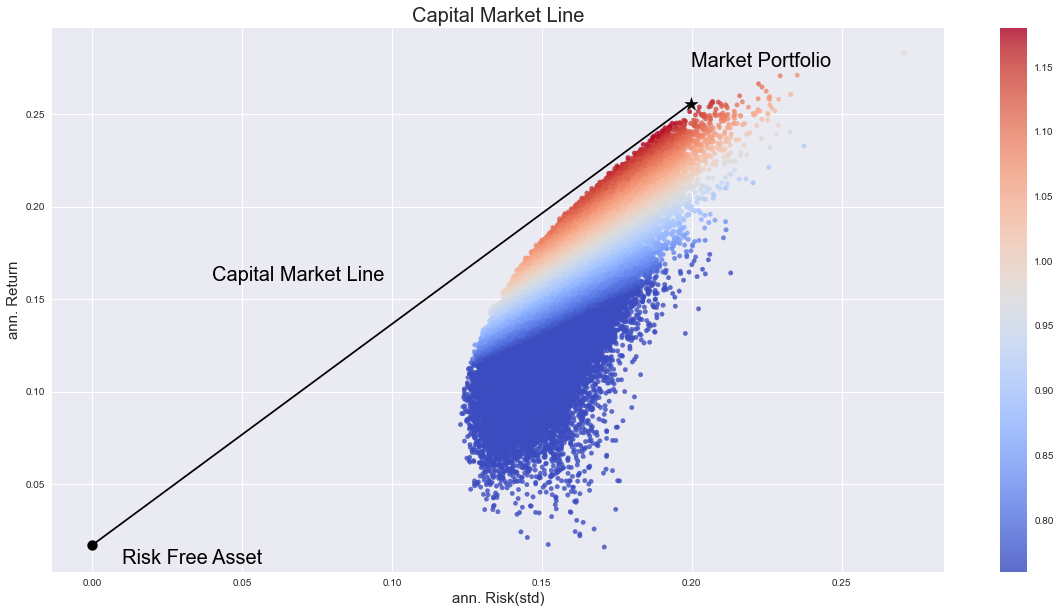

In [97]:
plt.figure(figsize = (20, 10))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.iloc[:, 2], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 200, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.iloc[6, 1], summary.iloc[6, 0]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.plot([rf[1],summary.loc["MP", "Risk"]], [rf[0],summary.loc["MP", "Return"]], c = "black")
plt.annotate("Capital Market Line", xy = (0.04, 0.16), size = 20, color = "black")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Capital Market Line", fontsize = 20)
plt.show()

--------------------------------------

## The Portfolio Diversification Effect

In [41]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2231,0.2331,0.8840
DIS,0.1002,0.1887,0.4408
IBM,-0.0428,0.1994,-0.3002
KO,0.0685,0.1370,0.3757
MSFT,0.2488,0.2316,1.0007
MP,0.2558,0.1997,1.1962


In [48]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [49]:
weighted_av = summary.loc[:"MSFT", ["Return", "Risk"]].T.dot(opt_weights)
weighted_av

Return   0.2558
Risk     0.2525
dtype: float64

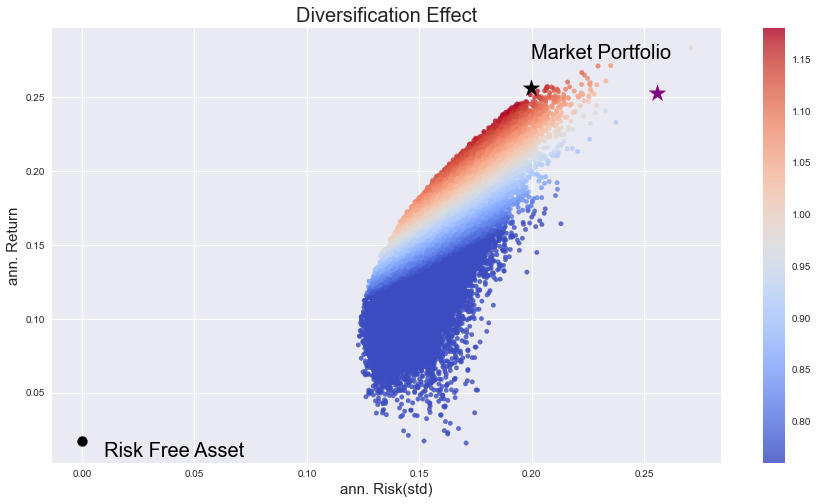

In [44]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 0.76, vmax = 1.18, alpha = 0.8)
plt.colorbar()
plt.scatter(summary.loc["MP", "Risk"], summary.loc["MP", "Return"],s= 300, c = "black", marker = "*")
plt.annotate("Market Portfolio", xy=(summary.loc["MP", "Risk"], summary.loc["MP", "Return"]+0.02), size = 20, color = "black")
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "black")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "black")
plt.scatter(weighted_av.Return, weighted_av.Risk,s= 300, c = "purple", marker = "*")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Diversification Effect", fontsize = 20)
plt.show()

In [45]:
three_stocks = pd.DataFrame(data = {"A": [0.05, 0.1, -0.02, 0.04, 0.06, -0.04, 0.03, 0.15, 0.06, 0.02], 
                                  "B": [0.05, 0.0, 0.12, 0.06, 0.04, 0.14, 0.07, -0.05, 0.04, 0.08], 
                                  "C": [0.1, 0.2, -0.04, 0.08, 0.12, -0.08, 0.06, 0.3, 0.12, 0.04]},
            index = range(1, 11))
three_stocks

,A,B,C
1,0.0500,0.0500,0.1000
2,0.1000,0.0000,0.2000
3,-0.0200,0.1200,-0.0400
4,0.0400,0.0600,0.0800
5,0.0600,0.0400,0.1200
6,-0.0400,0.1400,-0.0800
7,0.0300,0.0700,0.0600
8,0.1500,-0.0500,0.3000
9,0.0600,0.0400,0.1200
10,0.0200,0.0800,0.0400


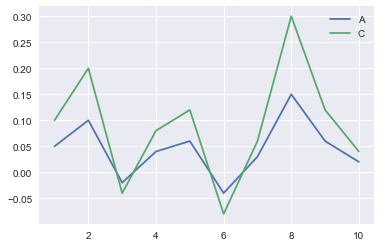

In [47]:
three_stocks.loc[:, ["A", "C"]].plot()
plt.show()

In [50]:
three_stocks.iloc[:, :3].corr()

,A,B,C
A,1.0000,-1.0000,1.0000
B,-1.0000,1.0000,-1.0000
C,1.0000,-1.0000,1.0000


In [51]:
three_stocks["AB"] = three_stocks[["A", "B"]].mean(axis = 1)

In [52]:
three_stocks["AC"] = three_stocks[["A", "C"]].mean(axis = 1)

In [53]:
three_stocks

,A,B,C,AB,AC
1,0.0500,0.0500,0.1000,0.0500,0.0750
2,0.1000,0.0000,0.2000,0.0500,0.1500
3,-0.0200,0.1200,-0.0400,0.0500,-0.0300
4,0.0400,0.0600,0.0800,0.0500,0.0600
5,0.0600,0.0400,0.1200,0.0500,0.0900
6,-0.0400,0.1400,-0.0800,0.0500,-0.0600
7,0.0300,0.0700,0.0600,0.0500,0.0450
8,0.1500,-0.0500,0.3000,0.0500,0.2250
9,0.0600,0.0400,0.1200,0.0500,0.0900
10,0.0200,0.0800,0.0400,0.0500,0.0300


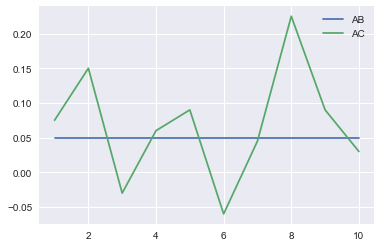

In [54]:
three_stocks.loc[:, ["AB", "AC"]].plot()
plt.show()

In [55]:
summ = three_stocks.agg(["mean", "std"])
summ

,A,B,C,AB,AC
mean,0.0450,0.0550,0.0900,0.0500,0.0675
std,0.0546,0.0546,0.1092,0.0000,0.0819


In [56]:
summ[["A", "B"]].mean(axis = 1)

mean   0.0500
std    0.0546
dtype: float64

In [57]:
summ[["A", "C"]].mean(axis = 1)

mean   0.0675
std    0.0819
dtype: float64

In [58]:
ret.corr()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
AMZN,1.0000,0.3610,0.3413,0.3005,0.2123,0.5328,0.7920
BA,0.3610,1.0000,0.4185,0.4084,0.3122,0.4105,0.7391
DIS,0.3413,0.4185,1.0000,0.3890,0.3231,0.4048,0.4918
IBM,0.3005,0.4084,0.3890,1.0000,0.3364,0.4644,0.4984
KO,0.2123,0.3122,0.3231,0.3364,1.0000,0.3398,0.3670
MSFT,0.5328,0.4105,0.4048,0.4644,0.3398,1.0000,0.8362
MP,0.7920,0.7391,0.4918,0.4984,0.3670,0.8362,1.0000


## Systematic vs. unsystematic (diversifiable) Risk

In [50]:
summary

,Return,Risk,Sharpe
AMZN,0.3105,0.3099,0.9471
BA,0.2231,0.2331,0.8840
DIS,0.1002,0.1887,0.4408
IBM,-0.0428,0.1994,-0.3002
KO,0.0685,0.1370,0.3757
MSFT,0.2488,0.2316,1.0007
MP,0.2558,0.1997,1.1962


In [51]:
summary["TotalRisk_var"] = summary.Risk ** 2

In [52]:
summary

,Return,Risk,Sharpe,TotalRisk_var
AMZN,0.3105,0.3099,0.9471,0.0960
BA,0.2231,0.2331,0.8840,0.0543
DIS,0.1002,0.1887,0.4408,0.0356
IBM,-0.0428,0.1994,-0.3002,0.0398
KO,0.0685,0.1370,0.3757,0.0188
MSFT,0.2488,0.2316,1.0007,0.0537
MP,0.2558,0.1997,1.1962,0.0399


In [53]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067,-0.0027
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068,-0.0012
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211,-0.0081
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079,0.0113
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0037


In [54]:
COV = ret.cov()*252

In [55]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MP
AMZN,0.0960,0.0261,0.0200,0.0186,0.0090,0.0382,0.0490
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222,0.0344
DIS,0.0200,0.0184,0.0356,0.0146,0.0084,0.0177,0.0185
IBM,0.0186,0.0190,0.0146,0.0398,0.0092,0.0214,0.0198
KO,0.0090,0.0100,0.0084,0.0092,0.0188,0.0108,0.0100
MSFT,0.0382,0.0222,0.0177,0.0214,0.0108,0.0537,0.0387
MP,0.0490,0.0344,0.0185,0.0198,0.0100,0.0387,0.0399


In [56]:
opt_weights

AMZN   0.2596
BA     0.3488
DIS    0.0000
IBM    0.0000
KO     0.0000
MSFT   0.3916
dtype: float64

In [61]:
COV.iloc[:-1, -1].dot(opt_weights)

0.039863644914678635

In [62]:
COV.iloc[-1, -1]

0.03986364491467865

In [63]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [64]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var
AMZN,0.3105,0.3099,0.9471,0.0960,0.0490
BA,0.2231,0.2331,0.8840,0.0543,0.0344
DIS,0.1002,0.1887,0.4408,0.0356,0.0185
IBM,-0.0428,0.1994,-0.3002,0.0398,0.0198
KO,0.0685,0.1370,0.3757,0.0188,0.0100
MSFT,0.2488,0.2316,1.0007,0.0537,0.0387
MP,0.2558,0.1997,1.1962,0.0399,0.0399


In [65]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"] - summary["SystRisk_var"]

In [66]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.3105,0.3099,0.9471,0.0960,0.0490,0.0470
BA,0.2231,0.2331,0.8840,0.0543,0.0344,0.0199
DIS,0.1002,0.1887,0.4408,0.0356,0.0185,0.0171
IBM,-0.0428,0.1994,-0.3002,0.0398,0.0198,0.0199
KO,0.0685,0.1370,0.3757,0.0188,0.0100,0.0087
MSFT,0.2488,0.2316,1.0007,0.0537,0.0387,0.0150
MP,0.2558,0.1997,1.1962,0.0399,0.0399,-0.0000


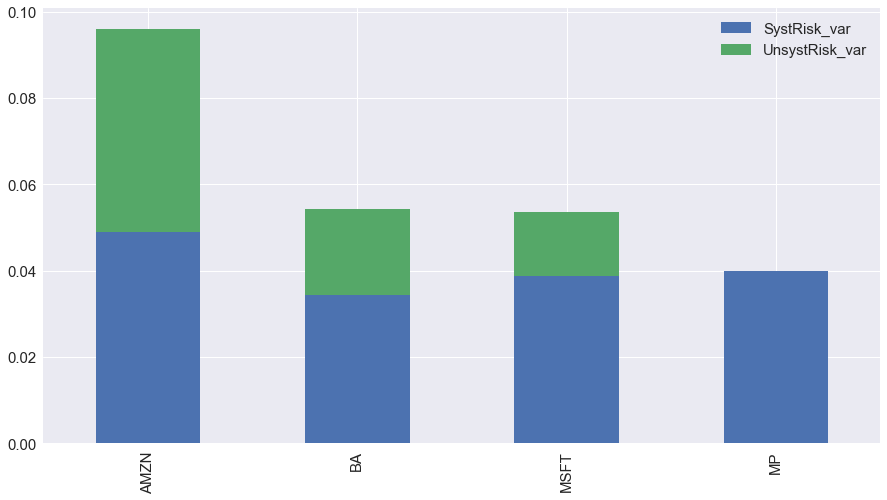

In [91]:
summary.iloc[[0, 1, 5, 6], 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

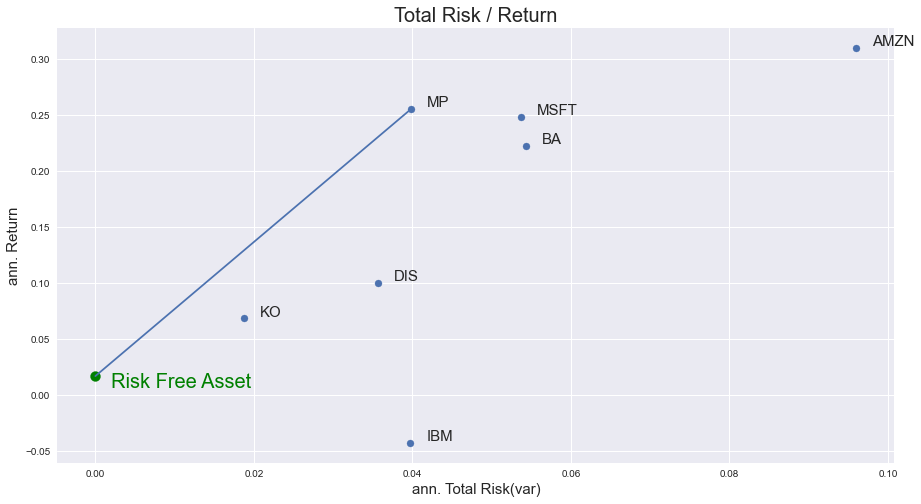

In [92]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.TotalRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "TotalRisk_var"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.plot([rf[1], summary.loc["MP", "TotalRisk_var"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Total Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Total Risk / Return", fontsize = 20)
plt.show()

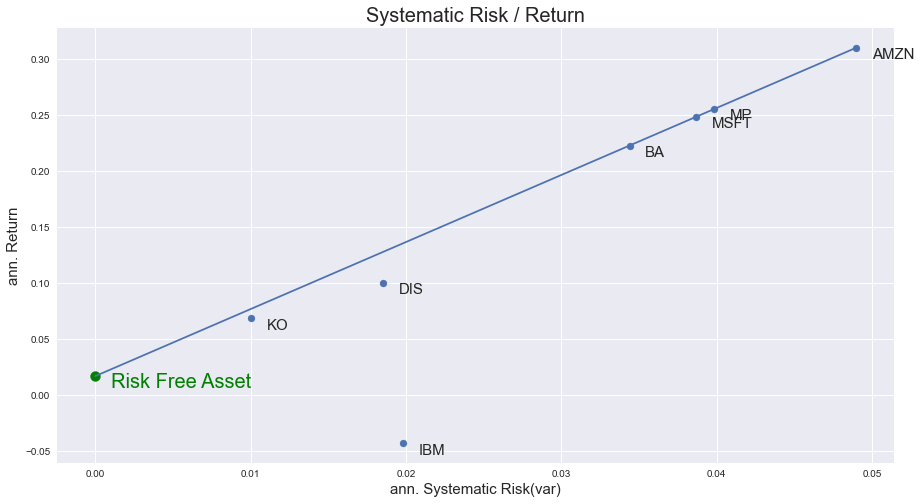

In [93]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.SystRisk_var, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "SystRisk_var"]+0.001, summary.loc[i, "Return"]-0.01), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "SystRisk_var"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.001, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("ann. Systematic Risk(var)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Systematic Risk / Return", fontsize = 20)
plt.show()

### CAPM & the Security Market Line

In [69]:
pd.options.display.float_format = '{:.4f}'.format

In [70]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AMZN,0.3105,0.3099,0.9471,0.0960,0.0490,0.0470
BA,0.2231,0.2331,0.8840,0.0543,0.0344,0.0199
DIS,0.1002,0.1887,0.4408,0.0356,0.0185,0.0171
IBM,-0.0428,0.1994,-0.3002,0.0398,0.0198,0.0199
KO,0.0685,0.1370,0.3757,0.0188,0.0100,0.0087
MSFT,0.2488,0.2316,1.0007,0.0537,0.0387,0.0150
MP,0.2558,0.1997,1.1962,0.0399,0.0399,-0.0000


In [71]:
summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

AMZN   1.2291
BA     0.8629
DIS    0.4648
IBM    0.4977
KO     0.2518
MSFT   0.9702
MP     1.0000
Name: SystRisk_var, dtype: float64

In [72]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]

In [73]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AMZN,0.3105,0.3099,0.9471,0.0960,0.0490,0.0470,1.2291
BA,0.2231,0.2331,0.8840,0.0543,0.0344,0.0199,0.8629
DIS,0.1002,0.1887,0.4408,0.0356,0.0185,0.0171,0.4648
IBM,-0.0428,0.1994,-0.3002,0.0398,0.0198,0.0199,0.4977
KO,0.0685,0.1370,0.3757,0.0188,0.0100,0.0087,0.2518
MSFT,0.2488,0.2316,1.0007,0.0537,0.0387,0.0150,0.9702
MP,0.2558,0.1997,1.1962,0.0399,0.0399,-0.0000,1.0000


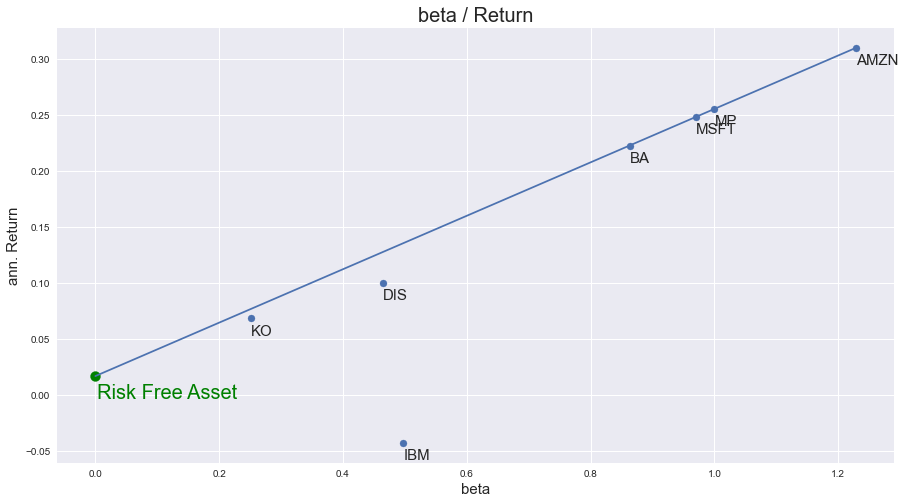

In [74]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "beta"]], [rf[0], summary.loc["AMZN", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

y =      i  +         slope           * x

Return = RFR + (Market Portfolio Return - RFR) * beta

In [75]:
rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.loc["AMZN", "beta"]

0.3105665063399088

In [76]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [77]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret
AMZN,0.3105,0.3099,0.9471,0.0960,0.0490,0.0470,1.2291,0.3106
BA,0.2231,0.2331,0.8840,0.0543,0.0344,0.0199,0.8629,0.2231
DIS,0.1002,0.1887,0.4408,0.0356,0.0185,0.0171,0.4648,0.1280
IBM,-0.0428,0.1994,-0.3002,0.0398,0.0198,0.0199,0.4977,0.1359
KO,0.0685,0.1370,0.3757,0.0188,0.0100,0.0087,0.2518,0.0771
MSFT,0.2488,0.2316,1.0007,0.0537,0.0387,0.0150,0.9702,0.2487
MP,0.2558,0.1997,1.1962,0.0399,0.0399,-0.0000,1.0000,0.2558


## Beta and Alpha

In [86]:
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AMZN,0.3105,0.3099,0.9471,0.0960,0.0490,0.0470,1.2291,0.3106,-0.0001
BA,0.2231,0.2331,0.8840,0.0543,0.0344,0.0199,0.8629,0.2231,-0.0000
DIS,0.1002,0.1887,0.4408,0.0356,0.0185,0.0171,0.4648,0.1280,-0.0278
IBM,-0.0428,0.1994,-0.3002,0.0398,0.0198,0.0199,0.4977,0.1359,-0.1787
KO,0.0685,0.1370,0.3757,0.0188,0.0100,0.0087,0.2518,0.0771,-0.0087
MSFT,0.2488,0.2316,1.0007,0.0537,0.0387,0.0150,0.9702,0.2487,0.0001
MP,0.2558,0.1997,1.1962,0.0399,0.0399,-0.0000,1.0000,0.2558,0.0000


In [81]:
summary["alpha"] = summary.Return - summary.capm_ret

In [80]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MP
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067,-0.0027
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068,-0.0012
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211,-0.0081
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079,0.0113
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0037


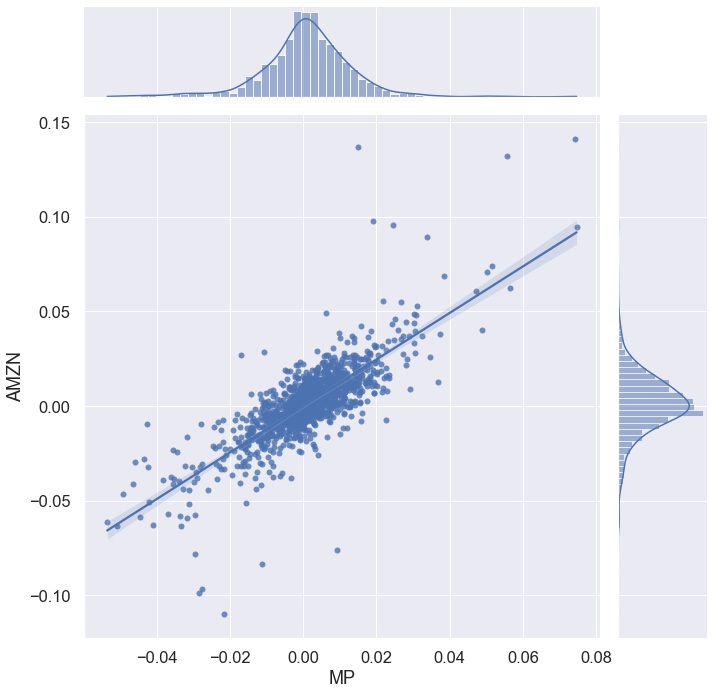

In [83]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MP", y = "AMZN", height = 10, kind = "reg")
plt.show()

In [84]:
np.polyfit(ret.MP, ret.AMZN, 1)

array([ 1.22913954e+00, -1.58326578e-05])

In [85]:
AMZN_beta = np.polyfit(ret.MP, ret.AMZN, 1)[0]
AMZN_beta

1.2291395387422717

In [ ]:
summary

## Final Considerations (and a more real world scenario)

In [88]:
ret.drop(columns = ["MP"], inplace =True)

In [95]:
ret

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067,-0.0068
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068,-0.0023
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211,-0.0085
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079,0.0101
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0081
...,...,...,...,...,...,...,...
2018-12-21,-0.0571,-0.0272,-0.0260,-0.0185,0.0007,-0.0323,-0.0358
2018-12-24,-0.0243,-0.0341,-0.0372,-0.0303,-0.0338,-0.0417,-0.0338
2018-12-26,0.0945,0.0672,0.0546,0.0355,0.0213,0.0682,0.0694


In [90]:
mcap_weights = pd.read_csv("../data/mcap_weights.csv", parse_dates = ["Date"], index_col = "Date")

In [92]:
mcap_weights

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2013-12-31,0.1882,0.0740,0.1320,0.1604,0.1697,0.2758
2014-01-02,0.1891,0.0746,0.1326,0.1597,0.1682,0.2758
2014-01-03,0.1888,0.0753,0.1326,0.1610,0.1677,0.2745
2014-01-06,0.1891,0.0764,0.1333,0.1618,0.1683,0.2711
2014-01-07,0.1893,0.0768,0.1329,0.1634,0.1672,0.2704
...,...,...,...,...,...,...
2018-12-21,0.3235,0.0822,0.0896,0.0472,0.0972,0.3603
2018-12-24,0.3267,0.0822,0.0893,0.0474,0.0972,0.3573
2018-12-26,0.3343,0.0820,0.0880,0.0459,0.0929,0.3570


In [93]:
mcap_weights.sum(axis=1)

Date
2013-12-31   1.0000
2014-01-02   1.0000
2014-01-03   1.0000
2014-01-06   1.0000
2014-01-07   1.0000
              ...  
2018-12-21   1.0000
2018-12-24   1.0000
2018-12-26   1.0000
2018-12-27   1.0000
2018-12-28   1.0000
Length: 1258, dtype: float64

In [94]:
ret["MCAP_P"] = ret.mul(mcap_weights.shift().dropna()).sum(axis = 1)

In [96]:
summary = ann_risk_return(ret)

In [97]:
summary

,Return,Risk
AMZN,0.3105,0.3099
BA,0.2231,0.2331
DIS,0.1002,0.1887
IBM,-0.0428,0.1994
KO,0.0685,0.1370
MSFT,0.2488,0.2316
MCAP_P,0.1817,0.1742


In [98]:
COV = ret.cov()*252

In [99]:
COV

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
AMZN,0.0960,0.0261,0.0200,0.0186,0.0090,0.0382,0.0432
BA,0.0261,0.0543,0.0184,0.0190,0.0100,0.0222,0.0237
DIS,0.0200,0.0184,0.0356,0.0146,0.0084,0.0177,0.0191
IBM,0.0186,0.0190,0.0146,0.0398,0.0092,0.0214,0.0201
KO,0.0090,0.0100,0.0084,0.0092,0.0188,0.0108,0.0109
MSFT,0.0382,0.0222,0.0177,0.0214,0.0108,0.0537,0.0350
MCAP_P,0.0432,0.0237,0.0191,0.0201,0.0109,0.0350,0.0304


In [100]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [101]:
summary["beta"] = summary.SystRisk_var / summary.loc["MCAP_P", "SystRisk_var"]

In [102]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.3105,0.3099,0.0432,1.4236
BA,0.2231,0.2331,0.0237,0.7793
DIS,0.1002,0.1887,0.0191,0.6282
IBM,-0.0428,0.1994,0.0201,0.6624
KO,0.0685,0.1370,0.0109,0.3597
MSFT,0.2488,0.2316,0.0350,1.1521
MCAP_P,0.1817,0.1742,0.0304,1.0000


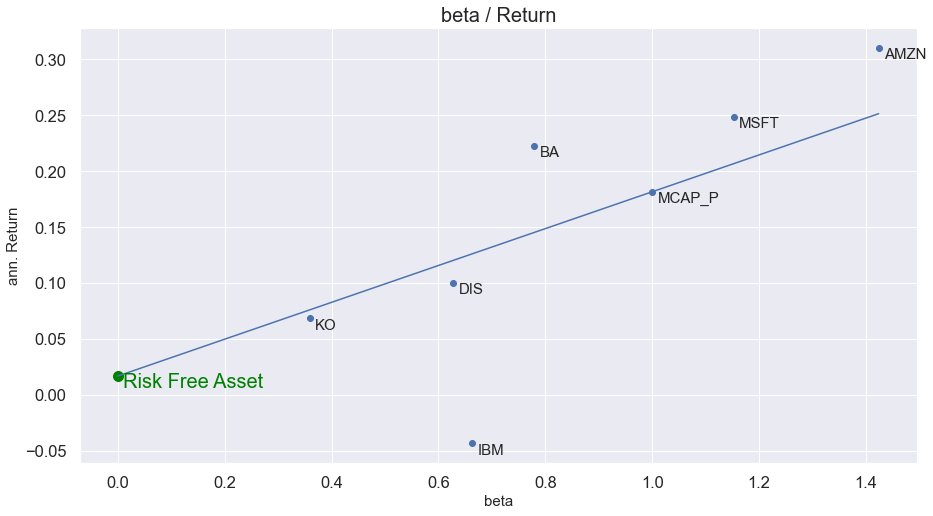

In [103]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.01, summary.loc[i, "Return"]-0.01), size = 15)
plt.plot([rf[1], summary.loc["AMZN", "beta"]], [rf[0],rf[0] + summary.loc["AMZN", "beta"]*(summary.loc["MCAP_P", "Return"] - rf[0])])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "green")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.01, rf[0] - 0.01), size = 20, color = "green")
plt.xlabel("beta", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("beta / Return", fontsize = 20)
plt.show()

## Another Intuition on Beta: Cyclical vs. non-Cyclical Stocks

In [104]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,MCAP_P
Date,,,,,,,
2014-01-02,-0.0021,0.0013,-0.0017,-0.0108,-0.0158,-0.0067,-0.0068
2014-01-03,-0.0038,0.0069,-0.0021,0.0060,-0.0051,-0.0068,-0.0023
2014-01-06,-0.0071,0.0058,-0.0037,-0.0034,-0.0045,-0.0211,-0.0085
2014-01-07,0.0112,0.0152,0.0068,0.0200,0.0030,0.0079,0.0101
2014-01-08,0.0098,0.0022,-0.0147,-0.0092,-0.0111,-0.0179,-0.0081


In [105]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.3105,0.3099,0.0432,1.4236
BA,0.2231,0.2331,0.0237,0.7793
DIS,0.1002,0.1887,0.0191,0.6282
IBM,-0.0428,0.1994,0.0201,0.6624
KO,0.0685,0.1370,0.0109,0.3597
MSFT,0.2488,0.2316,0.0350,1.1521
MCAP_P,0.1817,0.1742,0.0304,1.0000


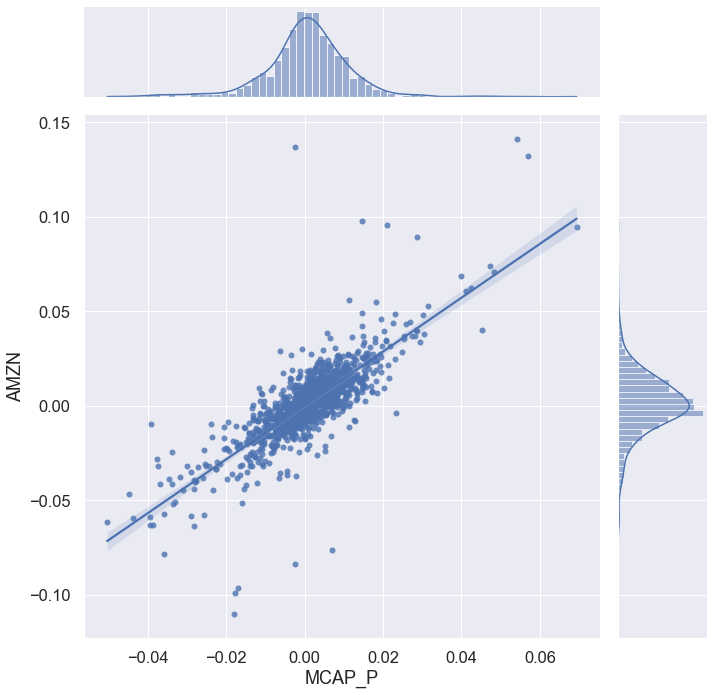

In [106]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MCAP_P", y = "AMZN", height = 10, kind = "reg")
plt.show()

In [107]:
np.polyfit(ret.MCAP_P, ret.AMZN, 1)

array([1.42357566e+00, 2.05469089e-04])

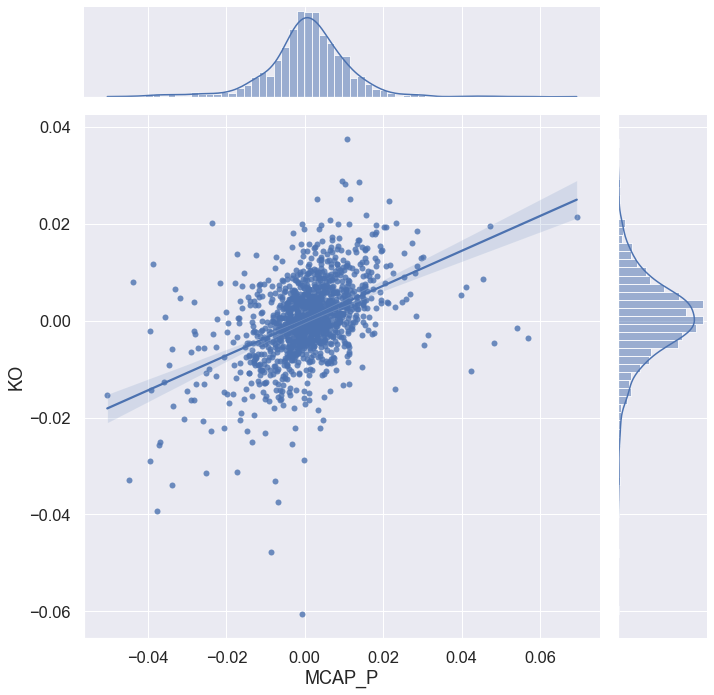

In [108]:
sns.set(font_scale=1.5)
sns.jointplot(data = ret, x = "MCAP_P", y = "KO", height = 10, kind = "reg")
plt.show()

In [110]:
import yfinance as yf
stocks = yf.download(["AMZN", "KO"], "2007-12-31", "2018-12-31").Close

[*********************100%***********************]  2 of 2 completed


In [111]:
stocks

,AMZN,KO
Date,,
2007-12-31,4.6320,30.6850
2008-01-02,4.8125,30.5450
2008-01-03,4.7605,30.8650
2008-01-04,4.4395,30.9250
2008-01-07,4.4410,31.6550
...,...,...
2018-12-21,68.8725,47.5700
2018-12-24,67.1980,45.9600
2018-12-26,73.5450,46.9400


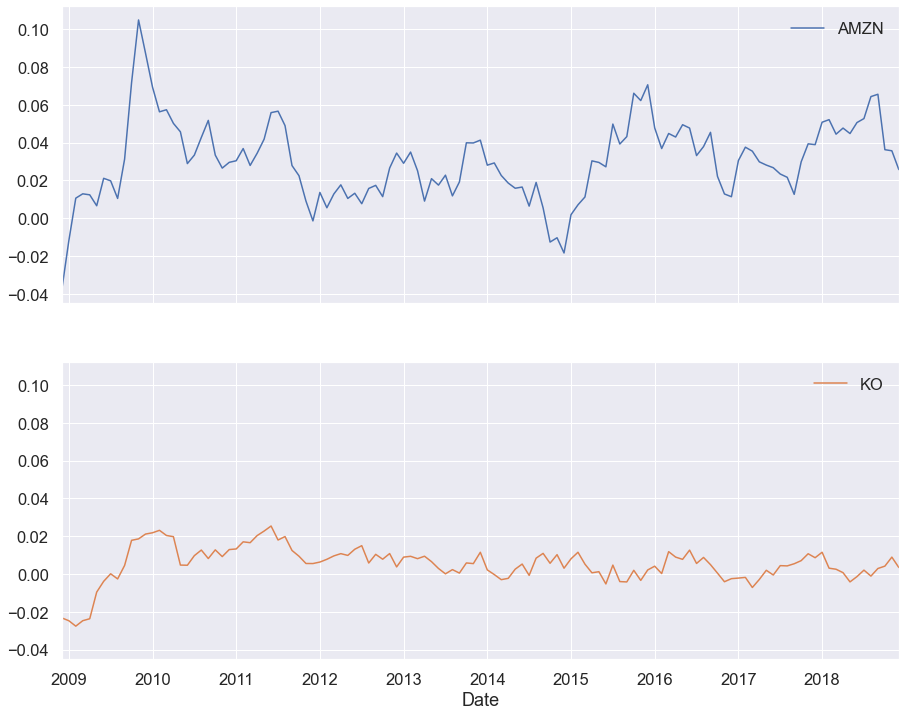

In [112]:
stocks.resample("M").last().pct_change().rolling(12).mean().dropna().plot(figsize = (15, 12), subplots = True, sharey = True)
plt.show()

In [113]:
summary

,Return,Risk,SystRisk_var,beta
AMZN,0.3105,0.3099,0.0432,1.4236
BA,0.2231,0.2331,0.0237,0.7793
DIS,0.1002,0.1887,0.0191,0.6282
IBM,-0.0428,0.1994,0.0201,0.6624
KO,0.0685,0.1370,0.0109,0.3597
MSFT,0.2488,0.2316,0.0350,1.1521
MCAP_P,0.1817,0.1742,0.0304,1.0000


In [ ]:
pd.options.display.float_format = '{:.4f}'.format

## Forward-looking Portfolios - 2-Asset Case (Mean-Variance Optimization)

In [ ]:
ret.head()

In [ ]:
two_assets = ret.iloc[:, :2]
two_assets.head()

In [ ]:
summ_two = ann_risk_return(two_assets)
summ_two

In [ ]:
w_AMZN = 0.6
w_BA = 0.4
ws = np.array([w_AMZN, w_BA])
ws

### Calculating Expected Portfolio Return

In [ ]:
ERet_AMZN = 0.20
ERet_BA = 0.15
ERets = pd.Series({"AMZN": ERet_AMZN, "BA": ERet_BA})
ERets

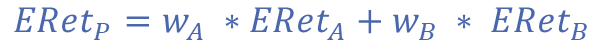

In [ ]:
ERet_P = w_AMZN * ERet_AMZN + w_BA * ERet_BA
ERet_P

In [ ]:
ERets.dot(ws)

### Calculating Expected Portfolio Risk

In [ ]:
cov_matrix = two_assets.cov() * 252
cov_matrix

In [ ]:
VAR_AMZN = cov_matrix.iloc[0,0]
VAR_AMZN

In [ ]:
VAR_BA = cov_matrix.iloc[1,1]
VAR_BA

In [ ]:
cov_AMZN_BA = cov_matrix.iloc[1,0]
cov_AMZN_BA

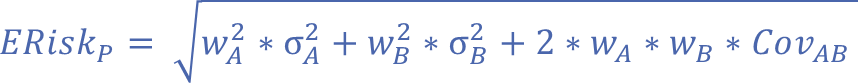

In [ ]:
ERisk_P = np.sqrt(w_AMZN**2 * VAR_AMZN + w_BA**2 * VAR_BA + 2 * w_AMZN * w_BA * cov_AMZN_BA)
ERisk_P

In [ ]:
np.sqrt(cov_matrix.dot(ws).dot(ws))

### Many Random Portfolios

In [ ]:
np.random.seed(123)
matrix = np.random.random(10000 * 2).reshape(10000, 2)

In [ ]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [ ]:
weights

In [ ]:
Return = ERets.dot(weights.T)
Return

In [ ]:
Risk = np.sqrt((cov_matrix.dot(weights.T).T * weights).sum(axis = 1))
Risk

In [ ]:
summ = pd.DataFrame({"Return" : Return, "Risk" : Risk})
summ

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red")
plt.scatter(summ_two.Risk, ERets, color = "blue")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Forward-looking Portfolios - not that simple

In [ ]:
ret.head()

In [ ]:
COV

In [ ]:
COV_C = COV.iloc[:-1, :-1]
COV_C

In [ ]:
summary

In [ ]:
summary_C = summary.iloc[:-1, :].copy()

In [ ]:
summary_C

In [ ]:
summary_C["ER1"] = [0.25, 0.15, 0.08, 0.08, 0.10, 0.15] 

In [ ]:
summary_C

In [ ]:
noa = len(summary_C.index)
noa

In [ ]:
nop = 1000000
nop

In [ ]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [ ]:
matrix

In [ ]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)

In [ ]:
weights

In [ ]:
Return = summary_C.ER1.dot(weights.T)
Return

In [ ]:
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis = 1))
Risk

In [ ]:
Risk.shape

In [ ]:
Return.shape

In [ ]:
rf = 0.02

In [ ]:
Sharpe = (Return - rf) / Risk

In [ ]:
summ = pd.DataFrame({"Return" : Return, "Risk" : Risk, "Sharpe" : Sharpe})
summ

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red")
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [ ]:
summ.describe()

In [ ]:
summ.Sharpe.idxmax()

In [ ]:
summ.iloc[summ.Sharpe.idxmax(), :]

In [ ]:
weights[summ.Sharpe.idxmax()]

In [ ]:
PF1 = pd.Series(index = summary_C.index, data = weights[summ.Sharpe.idxmax()])
PF1

### Changing Expected Returns

In [ ]:
summary_C

In [ ]:
summary_C["ER2"] = [0.22, 0.18, 0.11, 0.11, 0.07, 0.12]
summary_C

In [ ]:
Return = summary_C.ER2.dot(weights.T)
Return

In [ ]:
Risk = np.sqrt((COV_C.dot(weights.T).T * weights).sum(axis = 1))

In [ ]:
Sharpe = (Return - rf) / Risk

In [ ]:
summ2 = pd.DataFrame({"Return" : Return, "Risk" : Risk, "Sharpe" : Sharpe})
summ2

In [ ]:
plt.figure(figsize = (15, 9))
plt.scatter(summ.Risk, summ.Return,s= 20, color = "red", alpha = 0.3)
plt.scatter(summ2.Risk, summ2.Return,s= 20, color = "blue", alpha = 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

In [ ]:
summ2.describe()

In [ ]:
summ2.Sharpe.idxmax()

In [ ]:
summ2.iloc[summ2.Sharpe.idxmax(), :]

In [ ]:
summ.iloc[summ.Sharpe.idxmax(), :]

In [ ]:
weights[summ2.Sharpe.idxmax()]

In [ ]:
PF2 = pd.Series(index = summary_C.index, data = weights[summ2.Sharpe.idxmax()])
PF2

In [ ]:
PF1